In [34]:
import numpy as np
from scipy.stats import norm
%matplotlib inline
import matplotlib.pyplot as plt

In [12]:
# given data
strike = 40.0
vol = .3
rate = .08
tau = 1
div = 0.0

In [13]:
#Pricer
def blackScholesCall(spot, strike, vol, rate, tau, div):
    d1 = (np.log(spot / strike) + (rate - div + 0.5 * vol * vol) * tau) / (vol * np.sqrt(tau))
    d2 = d1 - (vol * np.sqrt(tau))
    callPrc = (spot * np.exp(-div * tau) * norm.cdf(d1)) - (strike * np.exp(-rate * tau) * norm.cdf(d2))
    
    return callPrc
    

In [39]:
## Delta
def bsmCallDelta(spot, strike, vol, rate, tau, div):
    d1 = (np.log(spot / strike) + (rate - div + 0.5 * vol * vol) * tau) / (vol * np.sqrt(tau))
    d2 = d1-(vol*np.sqrt(tau))
    cDelta = np.exp(-div * tau) * norm.cdf(d1)
    
    return cDelta

def bsmPutDelta(spot, strike, vol, rate, tau, div):
    d1 = (np.log(spot / strike) + (rate - div + 0.5 * vol * vol) * tau) / (vol * np.sqrt(tau))
    d2 = d1-(vol*np.sqrt(tau))
    pDelta = np.exp(-div*tau)*norm.cdf(-d1)

    return pDelta


In [40]:
## gamma
def bsmGamma(spot, strike, vol, rate, tau, div):
    d1 = (np.log(spot/strike)+(rate-div+0.5*vol*vol)*tau)/(vol*np.sqrt(tau))
    d2 = d1-(vol*np.sqrt(tau))
    gamma = (np.exp(-div*tau)/(spot*vol*np.sqrt(tau)))*norm.pdf(d1)
    
    return gamma

In [46]:
## Theta

def bsmCallTheta(spot, strike, vol, rate, tau, div):
    d1 = (np.log(spot/strike)+(rate-div+0.5*vol*vol)+tau)/(vol*np.sqrt(tau))
    d2 = d1-(vol*np.sqrt(tau))
    cTheta = (div*spot**(-div*tau))*norm.cdf(d1)-(rate*strike*np.exp(-rate*tau))*norm.cdf(d2-(((vol*strike*np.exp(-rate*tau))/2*np.sqrt(tau)))*norm.pdf(d2))
    
    return cTheta

def bsmPutTheta(spot, strike, vol, rate, tau, div):
    d1 = (np.log(spot/strike)+(rate-div+0.5*vol*vol)+tau)/(vol*np.sqrt(tau))
    d2 = d1-(vol*np.sqrt(tau))
    cTheta = (div*spot**(-div*tau))*norm.cdf(d1)-(rate*strike*np.exp(-rate*tau))*norm.cdf(d2-(((vol*strike*np.exp(-rate*tau))/2*np.sqrt(tau)))*norm.pdf(d2))
    pTheta = cTheta+(rate*strike*np.exp(-rate*tau))-(div*spot*np.exp(-div*tau))
    
    return pTheta

In [42]:
def bsmVega(spot, strike, vol, rate, tau, div):
    d1 = (np.log(spot/strike)+(rate-div+0.5*vol*vol)*tau)/(vol*np.sqrt(tau))
    d2 = d1-(vol*np.sqrt(tau))
    vega = spot*np.exp(-div*tau)*np.sqrt(tau)*norm.pdf(d1)
    
    return vega
    

In [43]:
def bsmCallRho(spot, strike, vol, rate, tau, div):
    d1 = (np.log(spot/strike)+(rate-div+0.5*vol*vol)*tau)/(vol*np.sqrt(tau))
    d2 = d1-(vol*np.sqrt(tau))
    cRho = tau*strike*np.exp(-rate*tau)*norm.cdf(d2)
    
    return cRho

def bsmPutRho(spot, strike, vol, rate, tau, div):
    d1 = (np.log(spot/strike)+(rate-div+0.5*vol*vol)*tau)/(vol*np.sqrt(tau))
    d2 = d1-(vol*np.sqrt(tau))
    pRho = tau*strike*np.exp(-rate*tau)*norm.cdf(-d2)
    
    return pRho
    

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


<function matplotlib.pyplot.show(*args, **kw)>

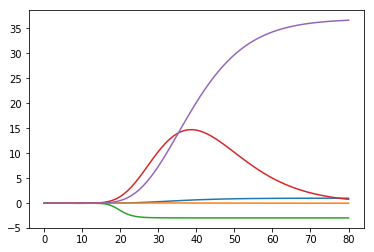

In [44]:
call_deltas= np.empty(81)
call_gammas= np.empty(81)
call_thetas= np.empty(81)
call_vegas= np.empty(81)
call_rhos= np.empty(81)

for i in range(81):
    call_deltas[i] = bsmCallDelta(i, strike, vol, rate, tau, div)
    call_gammas[i] = bsmGamma(i, strike, vol, rate, tau, div)
    call_thetas[i] = bsmCallTheta(i, strike, vol, rate, tau, div)
    call_vegas[i] = bsmVega(i, strike, vol, rate, tau, div)
    call_rhos[i] = bsmCallRho(i, strike, vol, rate, tau, div)
    
plt.plot(call_deltas)
plt.show

plt.plot(call_gammas)
plt.show

plt.plot(call_thetas)
plt.show

plt.plot(call_vegas)
plt.show

plt.plot(call_rhos)
plt.show


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divi

<function matplotlib.pyplot.show(*args, **kw)>

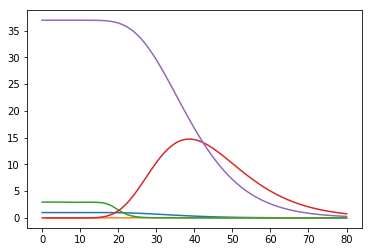

In [48]:
put_deltas= np.empty(81)
put_gammas= np.empty(81)
put_thetas= np.empty(81)
put_vegas= np.empty(81)
put_rhos= np.empty(81)

for i in range(81):
    put_deltas[i] = bsmPutDelta(i, strike, vol, rate, tau, div)
    put_gammas[i] = bsmGamma(i, strike, vol, rate, tau, div)
    put_thetas[i] = bsmPutTheta(i, strike, vol, rate, tau, div)
    put_vegas[i] = bsmVega(i, strike, vol, rate, tau, div)
    put_rhos[i] = bsmPutRho(i, strike, vol, rate, tau, div)
    
plt.plot(put_deltas)
plt.show

plt.plot(put_gammas)
plt.show

plt.plot(put_thetas)
plt.show

plt.plot(put_vegas)
plt.show

plt.plot(put_rhos)
plt.show


In [55]:
def plotPricerPath(path):
    nsteps = path.shape[0]
    plt.plot(path, 'b', linewidth = 2.5)
    plt.xlim((0, nsteps - 1))
    plt.grid(True)
    plt.show()

In [56]:
# given
spot = 41
strike = 40
vol = .3
rate = .08
tau = 1
div = 0.0

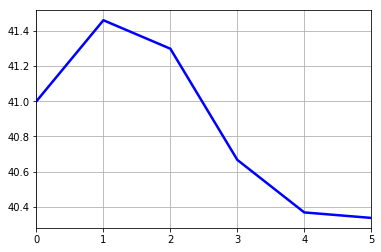

In [58]:
n = 6
path = np.zeros(n)
z=np.random.normal(size=n)
path[0] = spot
for t in range(1, n):
    path[t] = path[t-1] * np.exp((rate - div - 0.5 * vol * vol) * tau * vol * np.sqrt(tau) * z[t])
plotPricerPath(path)